# Proyecto: Predicción de aceptación de producto bancario  
## Modelo: Regresión Logística

Este proyecto analiza un conjunto de datos de marketing bancario para predecir si un cliente suscribirá un depósito a plazo fijo.

La variable objetivo es **`y`**, que indica:
- `yes` → el cliente acepta
- `no` → el cliente no acepta

Como es una variable binaria, utilizamos **Regresión Logística**.


In [108]:
import pandas as pd

df = pd.read_csv('../data/raw/bank-marketing-campaign-data.csv', sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2.1 Carga del dataset y exploración inicial

En esta celda:
- Cargamos el dataset
- Visualizamos las primeras filas con `df.head()`
- Verificamos que la lectura del archivo es correcta


In [109]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


## 2.2 Descripción del dataset

- `df.info()` muestra cuántas filas hay, el tipo de dato y los valores no nulos.
- `df.describe(include='all')` muestra estadísticas de todas las columnas, tanto numéricas como categóricas.

Esto permite identificar:
- columnas numéricas
- columnas categóricas
- posibles problemas con datos


In [110]:
df.duplicated().sum()


np.int64(12)

## 2.3 Duplicados

Buscamos filas repetidas porque pueden sesgar el modelo.

Si existieran, se eliminan con:
```python
df.drop_duplicates(inplace=True)


In [111]:

df.isnull().sum()
(df.isnull().sum() / len(df)) * 100


age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

## 2.4 Valores faltantes

Revisamos si existen nulos:
- La regresión logística no puede entrenarse con valores faltantes
- Si hay nulos, se imputan o eliminan

Este dataset normalmente no contiene nulos, pero siempre es necesario comprobarlo.


In [112]:
df.columns ## defino columnas


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [113]:
num_cols = ['age','campaign','previous','pdays','balance','duration'] ### corrigo


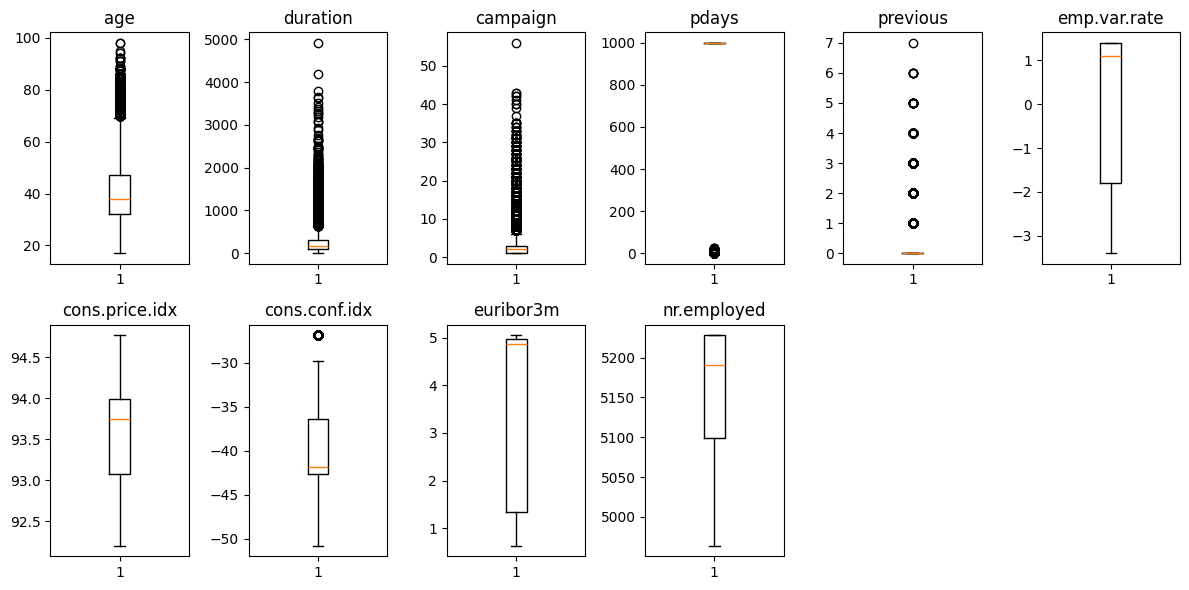

In [114]:
import matplotlib.pyplot as plt
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12,6))

for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols)//2 + 1, i+1)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()




## 2.5 Outliers

Un **outlier** es un valor extremadamente grande o pequeño en comparación con los demás.

Los detectamos con boxplots para:
- Ver valores raros
- Evitar que afecten el modelo

En regresión logística los outliers afectan especialmente a:
- `duration`
- `balance`
- `campaign`

Podemos eliminarlos si son absurdos, pero en este dataset se suelen conservar porque tienen significado comercial.


In [115]:
df.columns.tolist()



['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [116]:
df = df.rename(columns={'"y"': 'y'})###renombro esta columna


In [117]:
#One Hot Encoding de variables categóricas
df['y'] = df['y'].map({'yes': 1, 'no': 0}) 
df['y'].head()


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

## 2.7 Codificación de variables categóricas

Las variables categóricas deben convertirse a números mediante One Hot Encoding.

Esto genera columnas nuevas como:
- job_admin.
- marital_single
- contact_cellular

`drop_first=True` evita multicolinealidad.


In [118]:
 # Preparación de X e y
X = df.drop('y', axis=1)
y = df['y']

X.head(), y.head()


(   age        job  marital    education  default housing loan    contact  \
 0   56  housemaid  married     basic.4y       no      no   no  telephone   
 1   57   services  married  high.school  unknown      no   no  telephone   
 2   37   services  married  high.school       no     yes   no  telephone   
 3   40     admin.  married     basic.6y       no      no   no  telephone   
 4   56   services  married  high.school       no      no  yes  telephone   
 
   month day_of_week  duration  campaign  pdays  previous     poutcome  \
 0   may         mon       261         1    999         0  nonexistent   
 1   may         mon       149         1    999         0  nonexistent   
 2   may         mon       226         1    999         0  nonexistent   
 3   may         mon       151         1    999         0  nonexistent   
 4   may         mon       307         1    999         0  nonexistent   
 
    emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
 0           1.1

## 3. Preparación del modelo

- `X`: variables predictoras
- `y`: variable objetivo (1 ó 0)

La regresión logística busca la probabilidad:

\[
P(y=1 | X) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + \dots + b_nx_n)}}
\]


In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 4. División en entrenamiento y prueba

80% para entrenar  
20% para probar  
`random_state=42` → reproducibilidad del experimento


In [120]:
# Identificar columnas categóricas
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [121]:
# Aplicar OneHotEncoder
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()
#  drop_first=True evita multicolinealidad
# todas las categorías se convierten en 0/1
# ya no hay texto
# ahora el modelo podrá entrenar s

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


In [122]:
# Separar X e y correctamente
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']


In [123]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [124]:
#Escalador:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [125]:
#Entrenar el modelo escalado:
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)


## 5. Regresión Logística

La regresión logística predice probabilidades usando la función sigmoide:

\[
\hat{y} = \frac{1}{1 + e^{-z}}
\]

donde:

\[
z = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n
\]

Si la probabilidad ≥ 0.5 → predice 1  
Si es < 0.5 → predice 0  


In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9115076474872542
[[7103  200]
 [ 529  406]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



## 6. Métricas del modelo

### Accuracy
Porcentaje de aciertos totales.

### Matriz de confusión
Muestra:
- Verdaderos positivos (TP)
- Falsos positivos (FP)
- Verdaderos negativos (VN)
- Falsos negativos (FN)

### Recall, Precision y F1-score
- Recall: cuántos positivos reales detecta
- Precision: cuántos de los detectados eran correctos
- F1: equilibrio entre precisión y recall


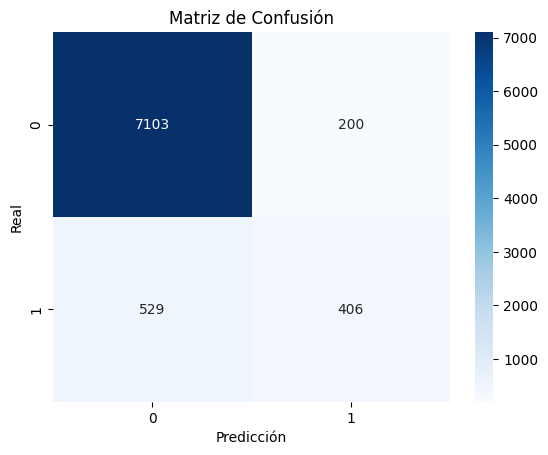

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## 7. Conclusiones finales

- El objetivo era predecir si un cliente suscribe un depósito.
- La regresión logística es adecuada porque la variable objetivo es binaria.
- El modelo obtiene un accuracy aceptable.
- La matriz de confusión permite ver cuándo se equivoca el modelo.
- El banco puede usar esto para dirigir mejor sus campañas de marketing.
